In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import re
import csv

In [2]:
# Clean data

data = pd.read_csv('164_data.csv')

data = data.drop(labels = ['EndDate', 'Status', 'IPAddress', 'Progress', 
        'Finished', 'RecordedDate', 'ResponseId',
        'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
        'ExternalReference', 'LocationLatitude', 'LocationLongitude',
        'DistributionChannel', 'UserLanguage', 'Q9',
        'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q20',
        'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29',
        'Q32_1', 'Q32_2', 'Q32_3',
        'Q32_4', 'Q32_5', 'Q32_6', 'Q32_7', 'Q32_8', 'Q32_9', 'Q32_10',
        'Q32_11', 'Q32_12', 'Q32_13', 'Q32_14', 'Q32_15', 'Q32_16'], axis=1)

data.columns = ['StartDate', 'Duration', 'Q_Eat', 'Q_Sleep', 'Q_Comfort', 'Q_Exercise',
       'C_First Click', 'C_Last Click', 'C_Page Submit',
       'C_Click Count', 'E_First Click', 'E_Last Click',
       'E_Page Submit', 'E_Click Count',
       'Q_Age', 'Q_Gender', 'Q_Ethn', 'Q_Income', 'Q_FinSec', 'Score', 'PSS',
       'Worry', 'SIMS', 'IM', 'IR', 'ER', 'AM', 'KeyResponses', 'PlayerScore']
data = data.iloc[1:]

data = data.assign(Group= data['C_Page Submit'].isna().apply(lambda x: 'Experimental' if x == True else 'Control'))

In [3]:
def combine_CE(data):
    CE_cols = np.unique([col[1] for col in data.columns.str.split('_') if col[0] in ['C', 'E']])
    for label in CE_cols:
        C_col = f"C_{label}"
        E_col = f"E_{label}"
        if C_col in data.columns and E_col in data.columns:
            data = data.assign(**{label: data[C_col].fillna(data[E_col])})
            data = data.drop(labels= [C_col, E_col], axis=1)

    return data

data = combine_CE(data)

In [4]:
def float_convert(value):
    try:
        return float(value)
    except:
        return np.nan

num_cols = ['Duration', 'Score', 'PSS', 'Worry', 'SIMS', 'IM', 'IR', 'ER', 'AM', 'PlayerScore', 'Page Submit']
for col in num_cols:
    data[col] = data[col].apply(float_convert)

In [ ]:
data = data.assign(SDI= 2*data["IM"]+data["IR"]-data["ER"]-2*data["AM"]).drop(labels= ['IM', 'IR', 'ER', 'AM'], axis=1)

In [7]:
num_cols = ['Duration', 'Score', 'PSS', 'Worry', 'SIMS', 'SDI', 'PlayerScore', 'Page Submit']

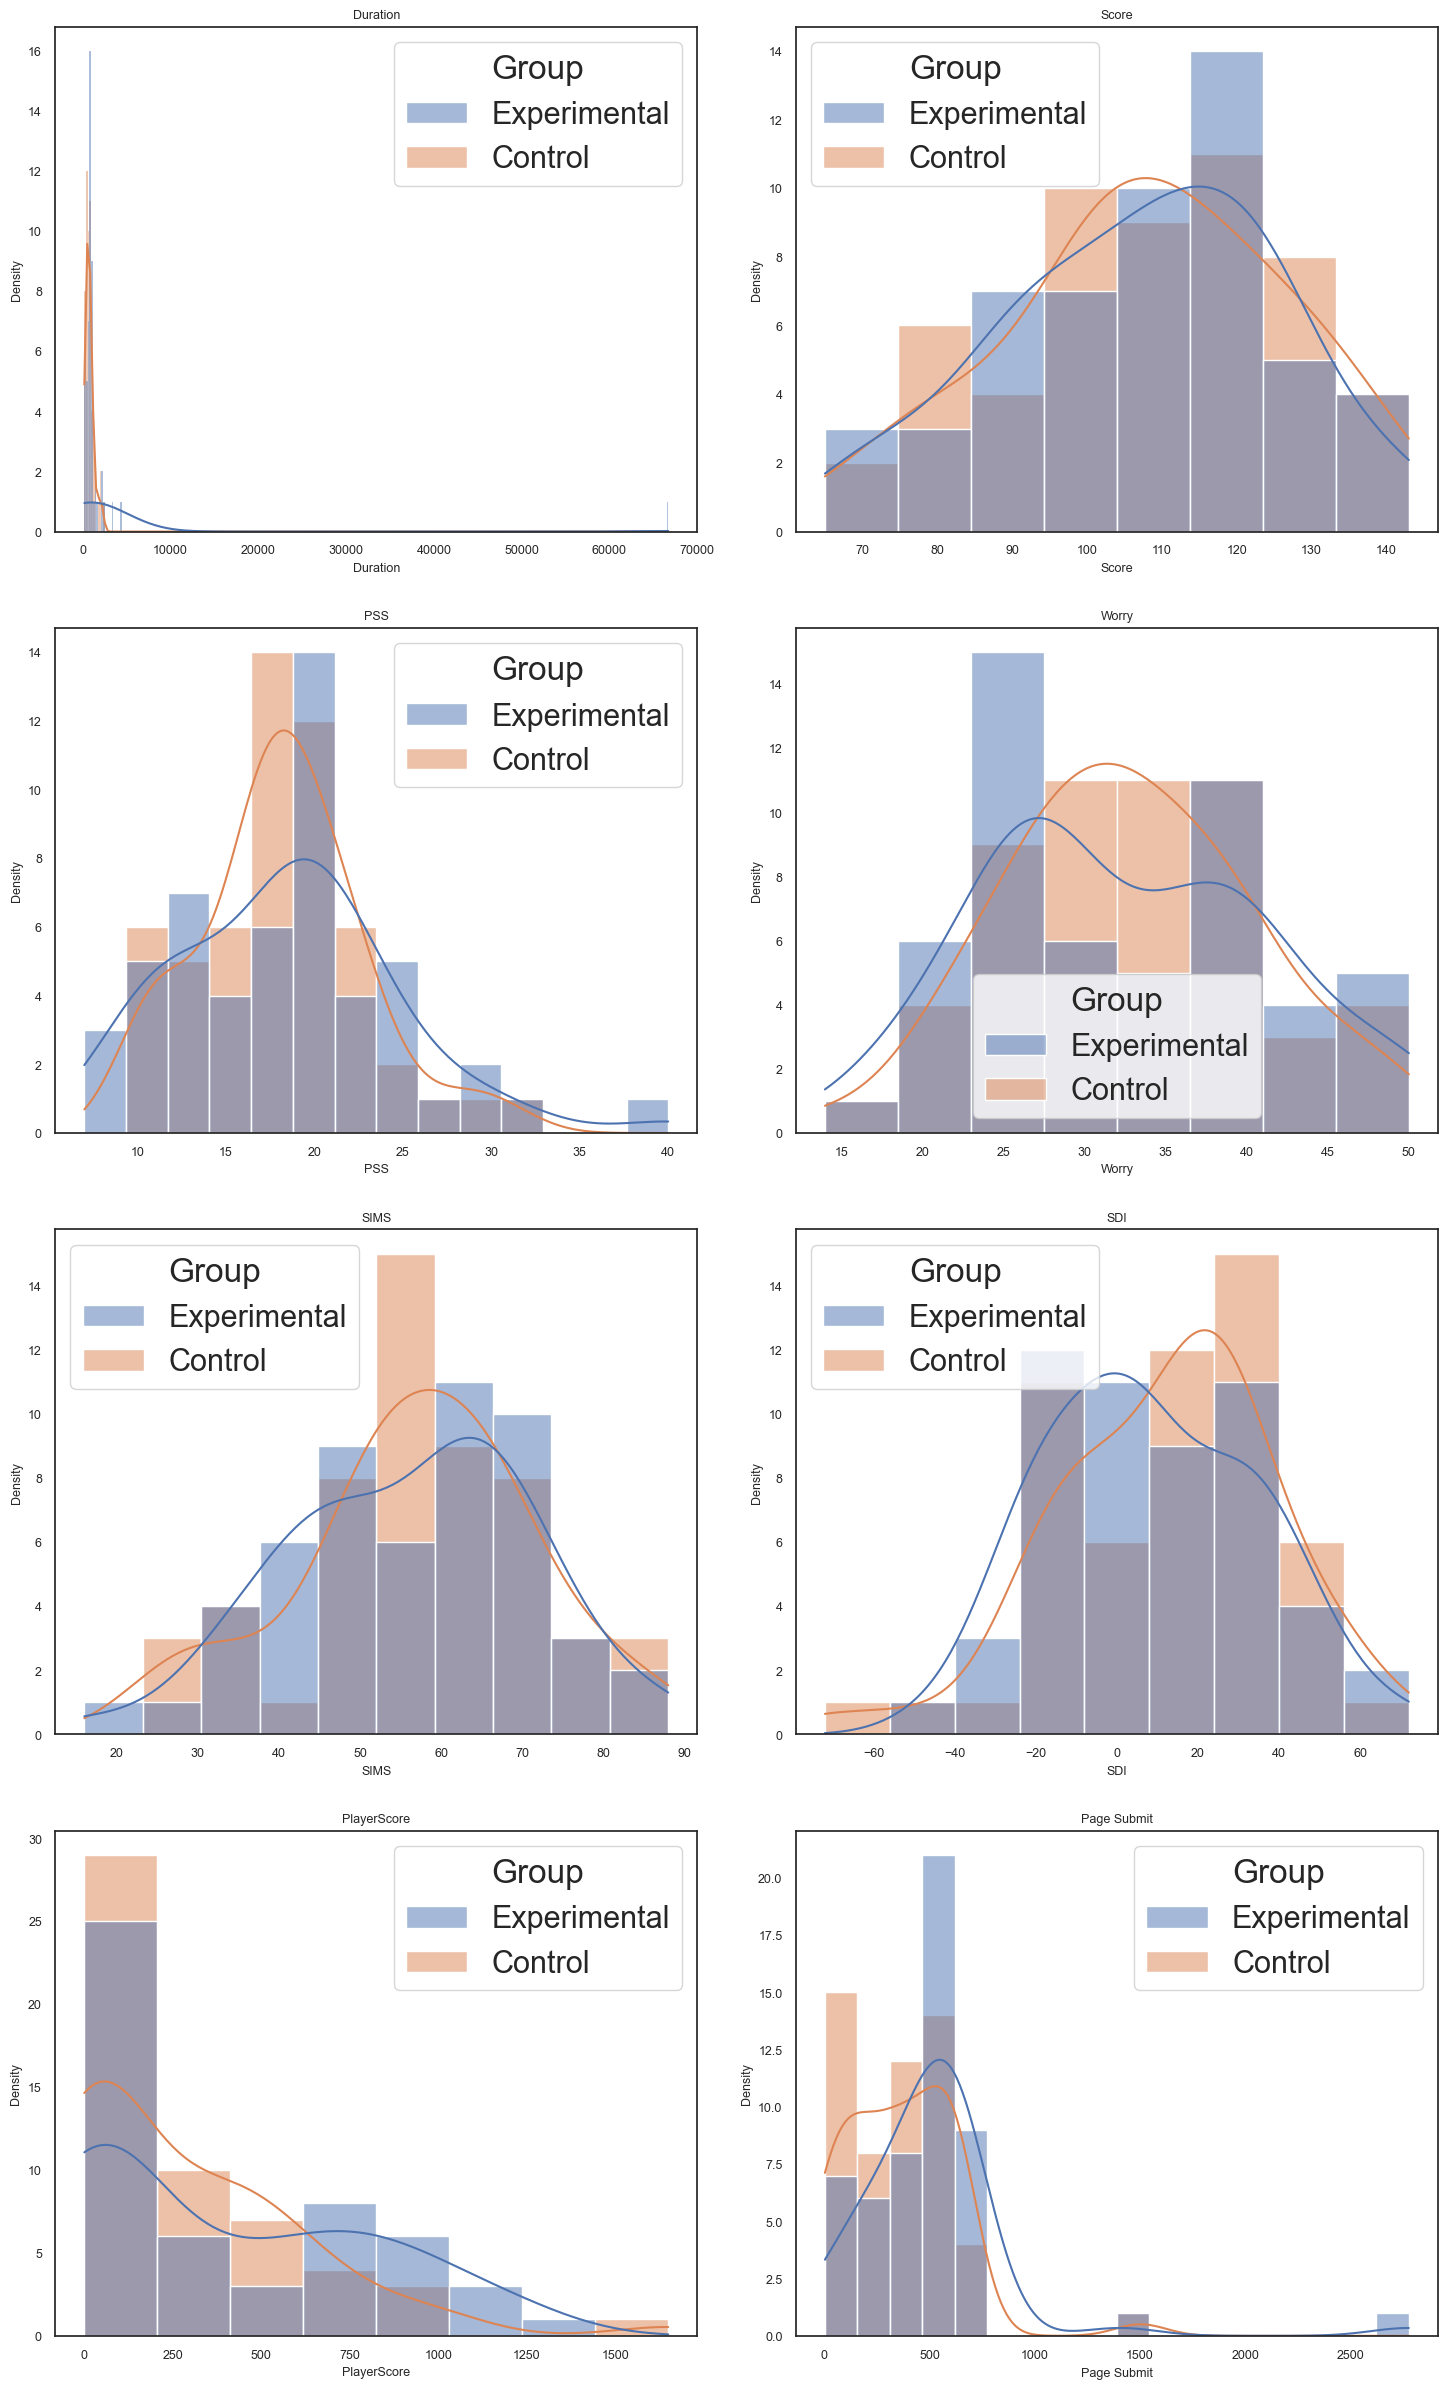

In [8]:
def btwn_groups_plots(data, subplots, fig_size):
    v, h = subplots[:2]
    fig, axes = plt.subplots(v, h, figsize=fig_size)
    label_size = 9
    i = 0

    if v * h == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for col in num_cols:
        sns.histplot(data= data, x= col, ax=axes[i], hue= 'Group', kde= True, common_norm= True)
        
        axes[i].set_title(col, fontsize=label_size)
        axes[i].set_xlabel(col, fontsize=label_size)
        axes[i].set_ylabel('Density', fontsize=label_size)
        axes[i].tick_params(axis="both", labelsize=label_size)
        i += 1
    fig.delaxes(axes[-1])
    fig.delaxes(axes[-2])
    plt.tight_layout()

btwn_groups_plots(data, [len(num_cols)//2+1, 2, 1], [15, 30])

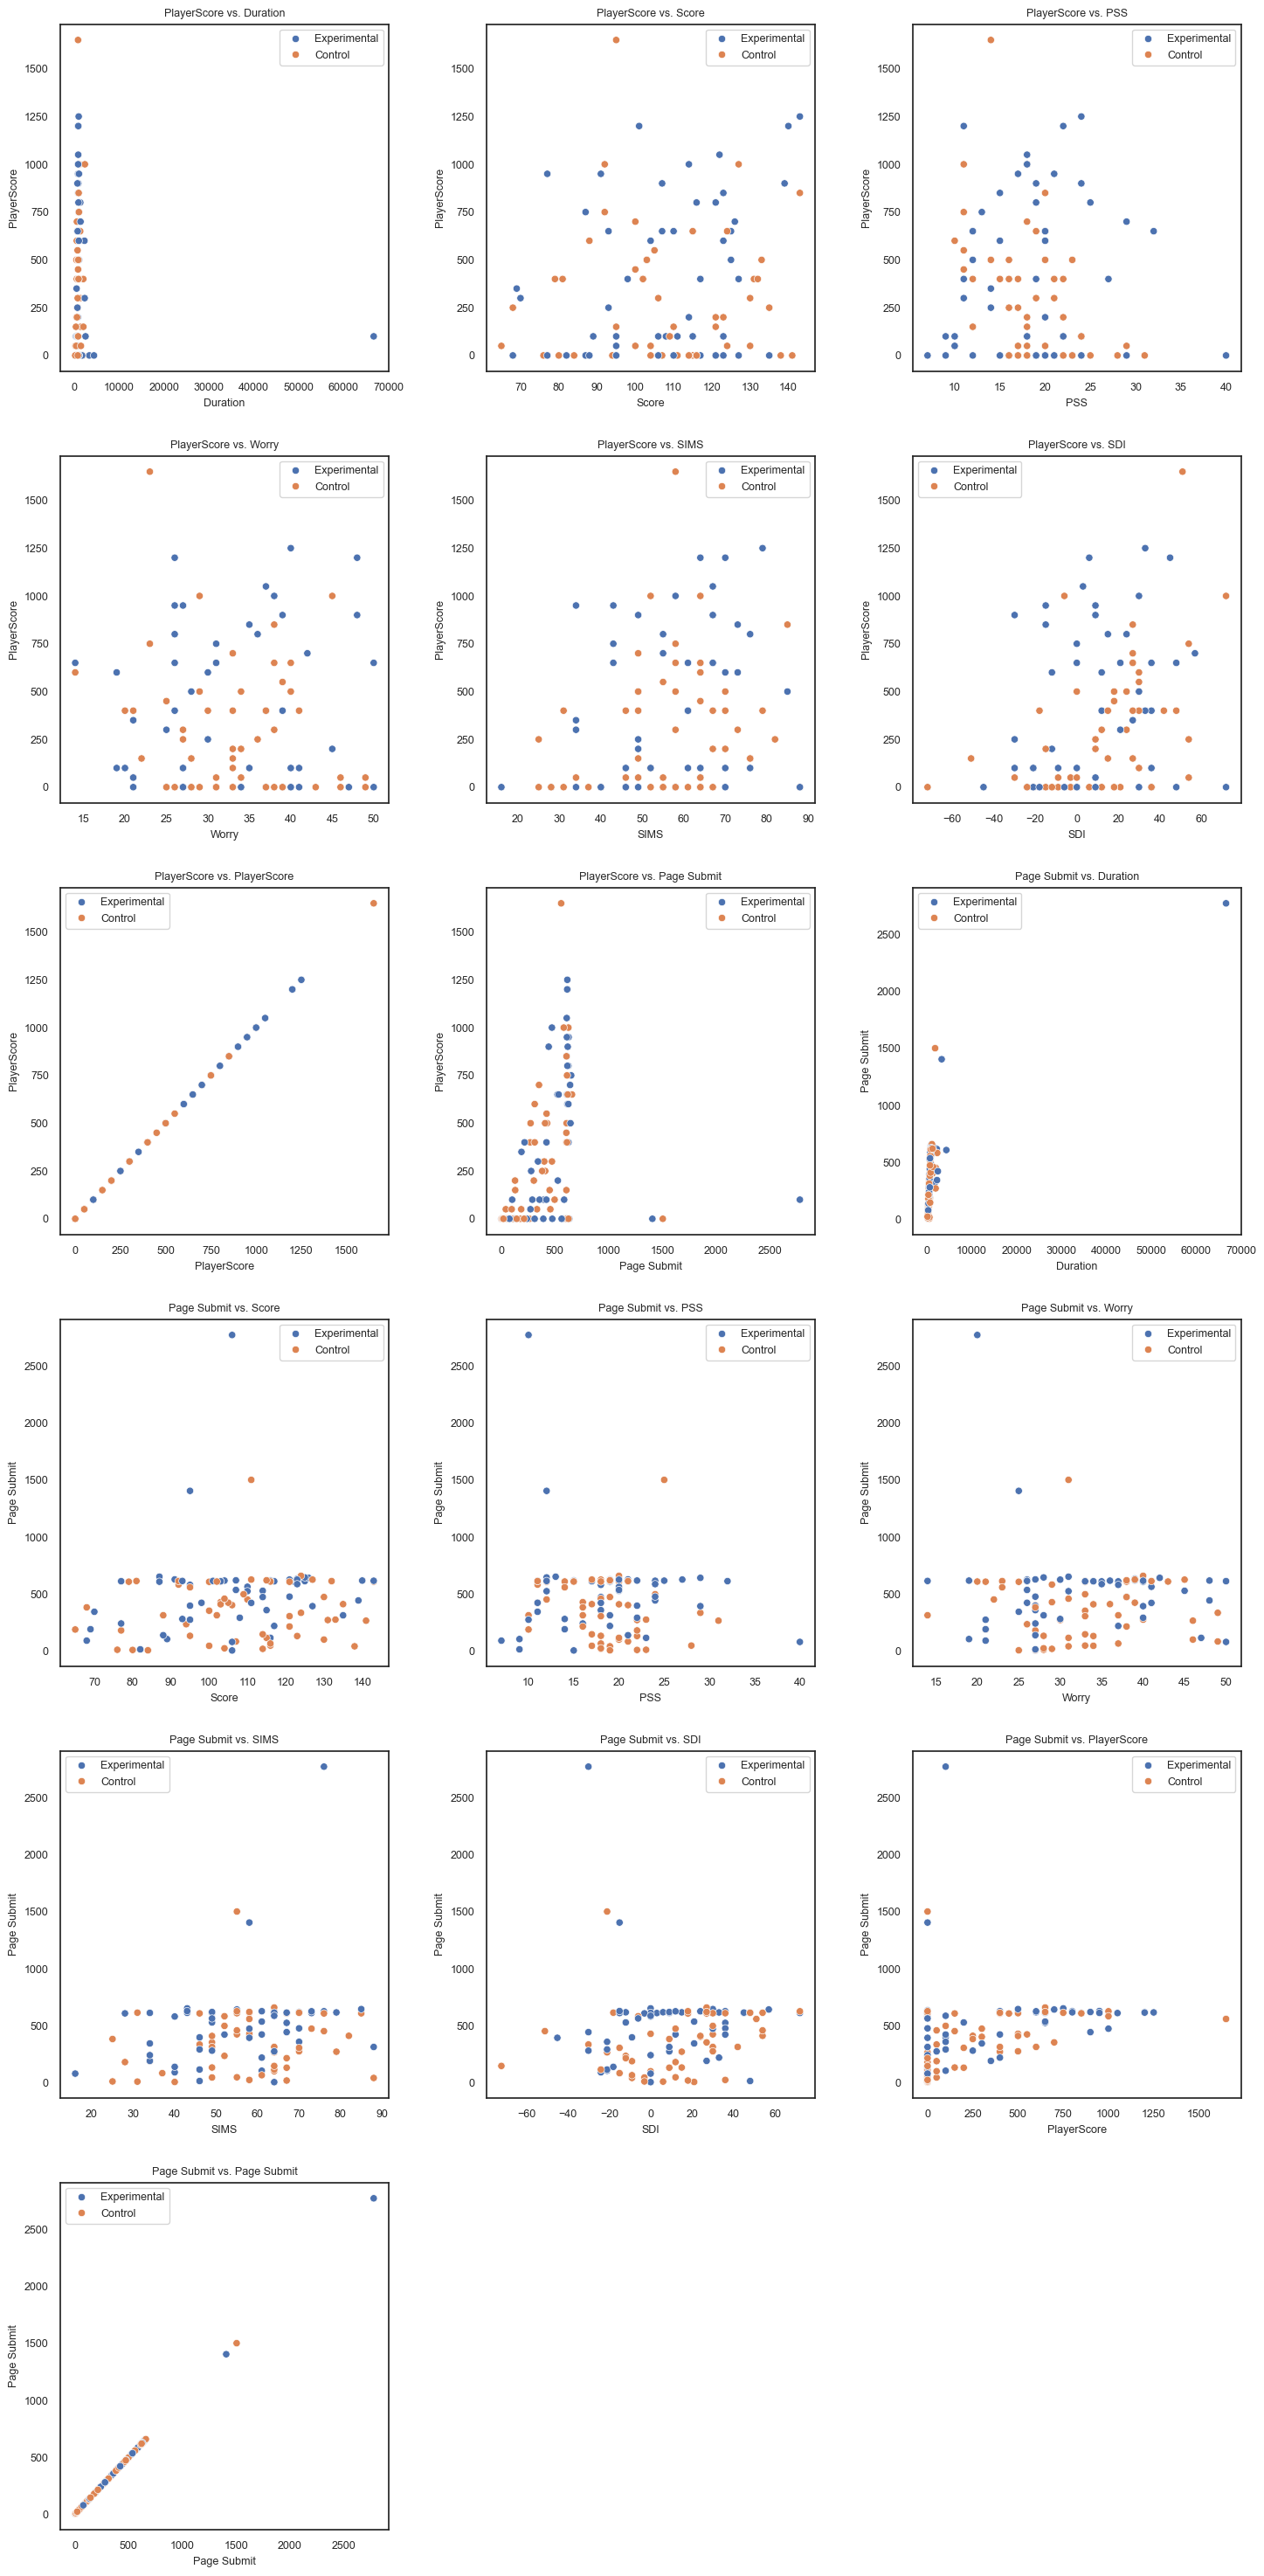

In [15]:
# temp
E_data = data[data['Group'] == 'Experimental']
C_data = data[data['Group'] == 'Control']

def within_groups_plots(data, subplots, fig_size):
    v, h = subplots[:2]
    fig, axes = plt.subplots(v, h, figsize=fig_size)
    label_size = 9
    i = 0

    if v * h == 1:
        axes = [axes]  # Convert single-axis to a list
    else:
        axes = axes.flatten()

    for y_col in ['PlayerScore', 'Page Submit']:
        for x_col in num_cols:
            sns.scatterplot(data= data, x= x_col, y= y_col, hue= "Group", ax=axes[i])
            axes[i].set_title(f"{y_col} vs. {x_col}", fontsize=label_size)
            axes[i].set_xlabel(x_col, fontsize=label_size)
            axes[i].set_ylabel(y_col, fontsize=label_size)
            axes[i].tick_params(axis="both", labelsize=label_size)
            axes[i].legend(fontsize= label_size)
            i += 1
    fig.delaxes(axes[-1])
    fig.delaxes(axes[-2])
    plt.tight_layout()

within_groups_plots(data, [6, 3, 1], [15, 30])

In [11]:
spearman_E = E_data.corr(method= 'spearman')
spearman_C = C_data.corr(method= 'spearman')




/var/folders/9z/nk4kcdcx20z9nh12_3vjt7jc0000gn/T/ipykernel_11255/531961409.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_E = E_data.corr(method= 'spearman')
/var/folders/9z/nk4kcdcx20z9nh12_3vjt7jc0000gn/T/ipykernel_11255/531961409.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_C = C_data.corr(method= 'spearman')


In [12]:
spearman_E


,Duration,Score,PSS,Worry,SIMS,PlayerScore,Page Submit,SDI
Duration,1.000000,0.194061,-0.019337,-0.051767,0.301656,0.188241,0.726591,0.339071
Score,0.194061,1.000000,0.599135,0.597618,0.644157,0.245113,0.326710,0.152055
PSS,-0.019337,0.599135,1.000000,0.708923,-0.063084,0.045672,0.131130,-0.019438
Worry,-0.051767,0.597618,0.708923,1.000000,-0.122996,0.056313,0.062499,-0.018433
SIMS,0.301656,0.644157,-0.063084,-0.122996,1.000000,0.278796,0.348601,0.188338
PlayerScore,0.188241,0.245113,0.045672,0.056313,0.278796,1.000000,0.494198,0.248644
Page Submit,0.726591,0.326710,0.131130,0.062499,0.348601,0.494198,1.000000,0.231255
SDI,0.339071,0.152055,-0.019438,-0.018433,0.188338,0.248644,0.231255,1.000000


In [13]:
spearman_C

,Duration,Score,PSS,Worry,SIMS,PlayerScore,Page Submit,SDI
Duration,1.000000,0.075660,-0.242571,-0.025744,0.196331,0.524852,0.827711,0.269777
Score,0.075660,1.000000,0.441735,0.687310,0.763760,-0.038839,0.090685,0.006685
PSS,-0.242571,0.441735,1.000000,0.406694,-0.003497,-0.358012,-0.275032,-0.180358
Worry,-0.025744,0.687310,0.406694,1.000000,0.169396,-0.005944,0.155498,-0.003061
SIMS,0.196331,0.763760,-0.003497,0.169396,1.000000,0.158975,0.134523,0.128860
PlayerScore,0.524852,-0.038839,-0.358012,-0.005944,0.158975,1.000000,0.605099,0.513500
Page Submit,0.827711,0.090685,-0.275032,0.155498,0.134523,0.605099,1.000000,0.389738
SDI,0.269777,0.006685,-0.180358,-0.003061,0.128860,0.513500,0.389738,1.000000


/var/folders/9z/nk4kcdcx20z9nh12_3vjt7jc0000gn/T/ipykernel_11255/4061093302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = data.groupby(by= "Group").mean()


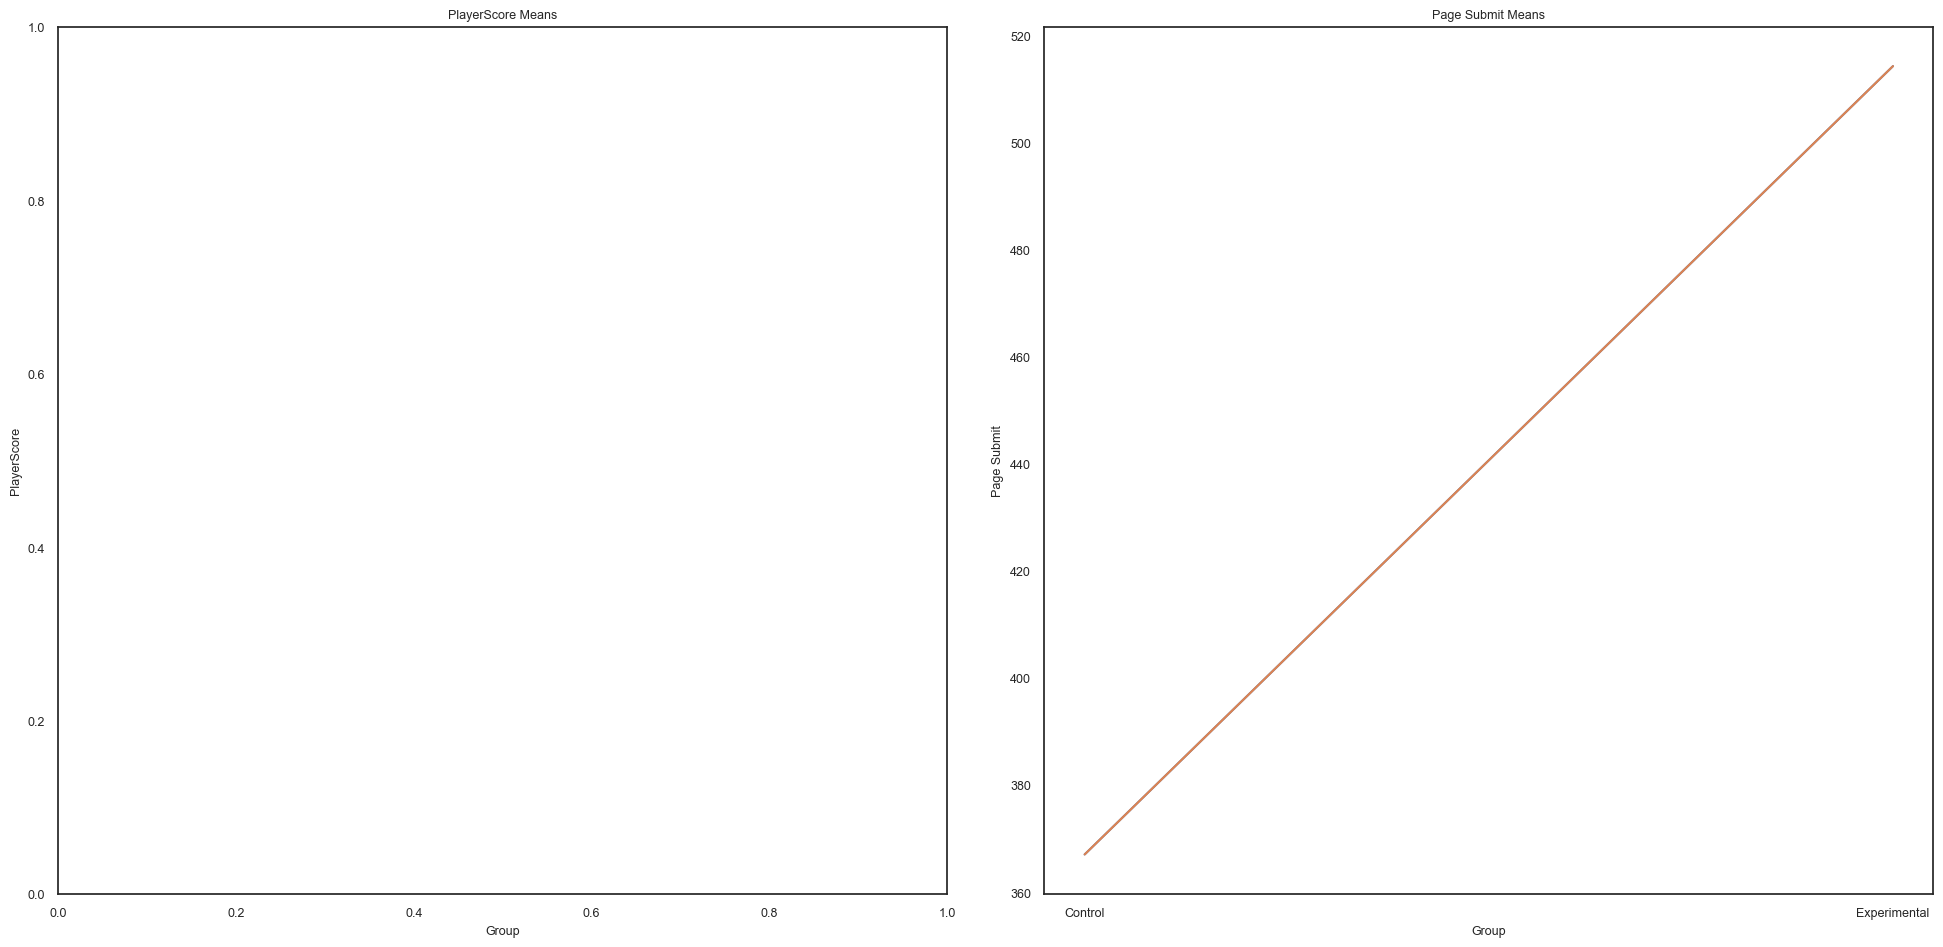

In [14]:
means = data.groupby(by= "Group").mean()

def plot_means(data):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    label_size = 9

    for i, y_col in enumerate(['PlayerScore', 'Page Submit']):
        sns.lineplot(data=means, x="Group", y=col)
        axes[i].set_title(f"{y_col} Means", fontsize=label_size)
        axes[i].set_xlabel("Group", fontsize=label_size)
        axes[i].set_ylabel(y_col, fontsize=label_size)
        axes[i].tick_params(axis="both", labelsize=label_size)
    plt.tight_layout()

plot_means(means)


Demographic Information

Text(0.5, 1.0, 'Participant Gender')

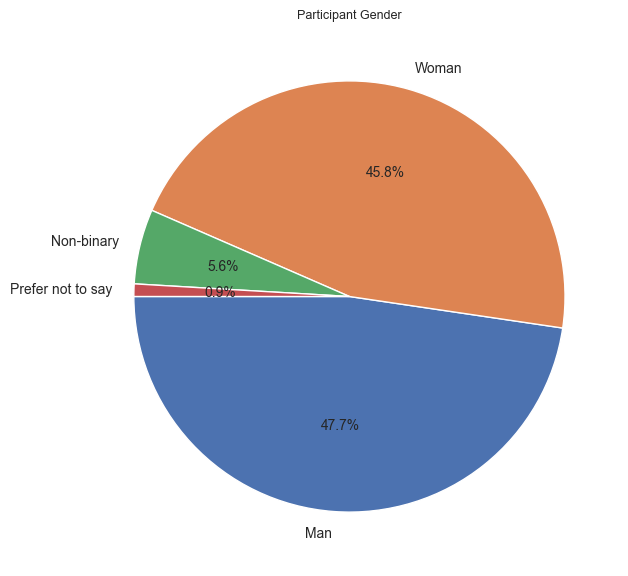

In [ ]:
# Gender
labelsize = 9
fig, ax = plt.subplots()
ax.pie(data["Q_Gender"].value_counts(), labels= data["Q_Gender"].value_counts().index, startangle=180, autopct='%1.1f%%', textprops= {"fontsize": 10})
ax.set_title("Participant Gender", fontsize= labelsize)

Text(0.5, 1.0, 'Participant Age')

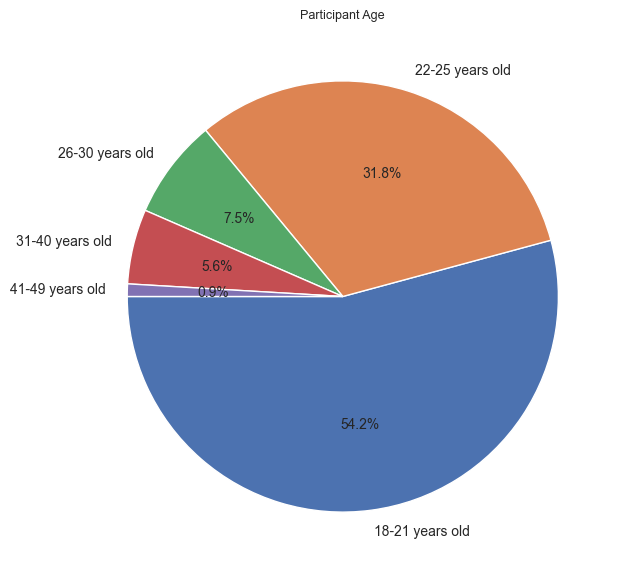

In [ ]:
# Age
labelsize = 9
fig, ax = plt.subplots()
ax.pie(data["Q_Age"].value_counts(), labels= data["Q_Age"].value_counts().index, startangle=180, autopct='%1.1f%%', textprops= {"fontsize": 10})
ax.set_title("Participant Age", fontsize= labelsize)

Text(0.5, 1.0, 'Participant Ethnicity')

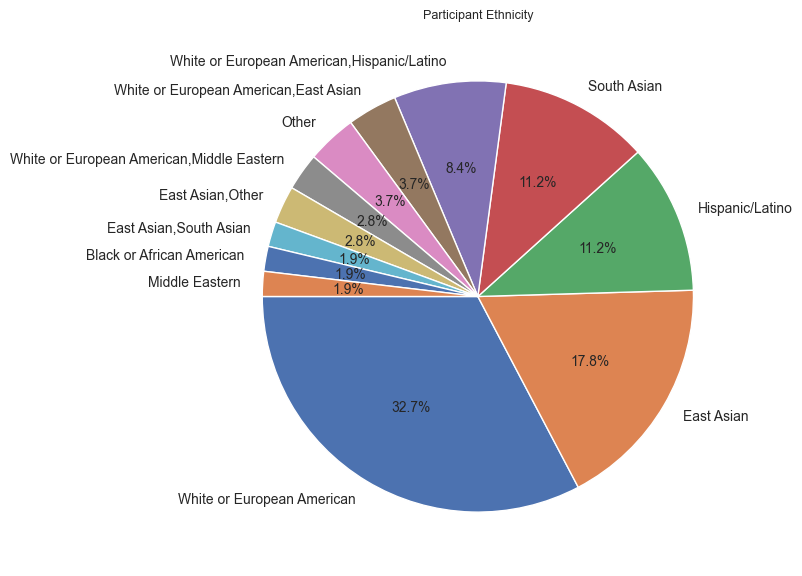

In [ ]:
# Ethnicity
labelsize = 9
fig, ax = plt.subplots()
ax.pie(data["Q_Ethn"].value_counts(), labels= data["Q_Ethn"].value_counts().index, startangle=180, autopct='%1.1f%%', textprops= {"fontsize": 10})
ax.set_title("Participant Ethnicity", fontsize= labelsize)

Text(0.5, 1.0, 'Participant Income')

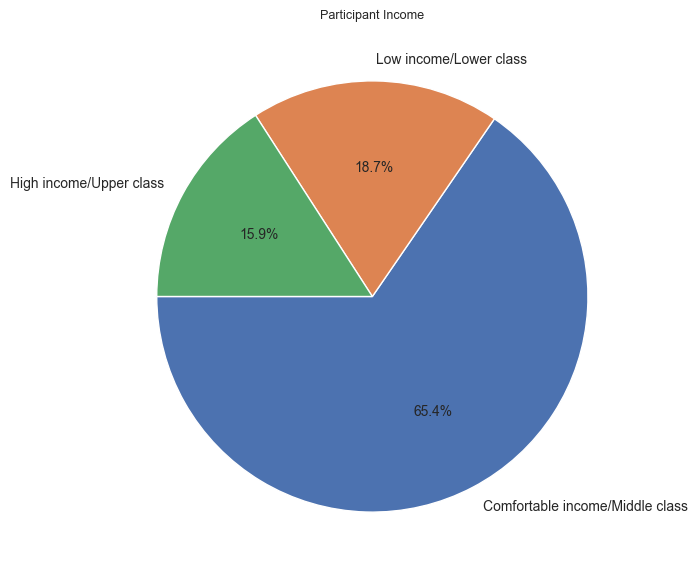

In [ ]:
# Income
labelsize = 9
fig, ax = plt.subplots()
ax.pie(data["Q_Income"].value_counts(), labels= data["Q_Income"].value_counts().index, startangle=180, autopct='%1.1f%%', textprops= {"fontsize": 10})
ax.set_title("Participant Income", fontsize= labelsize)

In [ ]:
# E vs C quitting time


,StartDate,Duration,Q_Eat,Q_Sleep,Q_Comfort,Q_Exercise,Q_Age,Q_Gender,Q_Ethn,Q_Income,...,IR,ER,AM,KeyResponses,PlayerScore,Group,Click Count,First Click,Last Click,Page Submit
2,3/7/25 15:52,236.0,≤ 2 hours ago,5-7 hours,Somewhat uncomfortable,1-2 days a week,18-21 years old,Non-binary,"White or European American,Hispanic/Latino",Low income/Lower class,...,10.0,16.0,10.0,NaN,0.0,Control,1,1.525,1.525,46.312
3,3/7/25 17:40,513.0,3-5 hours ago,5-7 hours,Somewhat comfortable,3-5 days a week,18-21 years old,Woman,East Asian,Comfortable income/Middle class,...,10.0,16.0,10.0,i,600.0,Control,0,0,0,312.924
6,3/10/25 14:10,953.0,≤ 2 hours ago,8+ hours,Somewhat comfortable,3-5 days a week,22-25 years old,Woman,White or European American,Comfortable income/Middle class,...,7.0,7.0,13.0,NaN,400.0,Control,0,0,0,614.065
7,3/10/25 15:24,571.0,3-5 hours ago,5-7 hours,Neither comfortable nor uncomfortable,3-5 days a week,18-21 years old,Woman,East Asian,Comfortable income/Middle class,...,7.0,13.0,19.0,NaN,50.0,Control,1,331.502,331.502,334.379
8,3/10/25 15:32,410.0,≤ 2 hours ago,5-7 hours,Somewhat comfortable,3-5 days a week,18-21 years old,Man,South Asian,Comfortable income/Middle class,...,7.0,19.0,13.0,u,0.0,Control,0,0,0,234.111
10,3/10/25 15:30,1244.0,≤ 2 hours ago,8+ hours,Somewhat uncomfortable,3-5 days a week,41-49 years old,Man,Hispanic/Latino,Low income/Lower class,...,19.0,7.0,13.0,i,300.0,Control,0,0,0,401.822
11,3/10/25 15:45,690.0,6-8 hours ago,5-7 hours,Somewhat uncomfortable,1-2 days a week,18-21 years old,Woman,East Asian,High income/Upper class,...,10.0,13.0,7.0,i,50.0,Control,1,11.678,11.678,187.611
17,3/10/25 21:28,696.0,≤ 2 hours ago,5-7 hours,Somewhat comfortable,1-2 days a week,18-21 years old,Man,White or European American,Comfortable income/Middle class,...,16.0,4.0,13.0,NaN,550.0,Control,2,98.227,99.663,423.330
19,3/10/25 22:06,1852.0,≤ 2 hours ago,5-7 hours,Somewhat comfortable,3-5 days a week,22-25 years old,Man,White or European American,Comfortable income/Middle class,...,10.0,7.0,25.0,i,0.0,Control,0,0,0,1503.299
21,3/11/25 14:36,224.0,≤ 2 hours ago,5-7 hours,Somewhat comfortable,1-2 days a week,18-21 years old,Woman,"East Asian,South Asian",Low income/Lower class,...,10.0,13.0,13.0,i,50.0,Control,1,1.592,1.592,44.341
